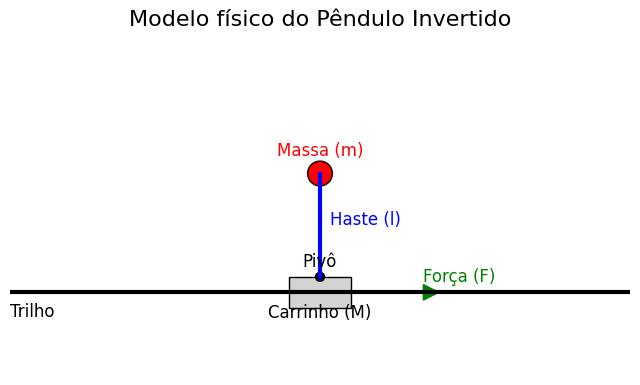

In [2]:
#@title PENDULO INVERTIDO


import matplotlib.pyplot as plt
import numpy as np

def desenhar_pendulo_invertido(x=0, theta_deg=0, l=1.0):
    """
    Desenha o modelo físico do pêndulo invertido.
    x: posição do carrinho no trilho (m)
    theta_deg: ângulo do pêndulo em graus (0 = vertical para cima)
    l: comprimento do pêndulo (m)
    """
    theta = np.radians(theta_deg)

    # Dimensões do carrinho
    carrinho_largura = 0.6
    carrinho_altura = 0.3

    # Posição do pivô (em cima do carrinho)
    pivo_x = x
    pivo_y = carrinho_altura / 2

    # Posição da massa pendular (ponta do pendulo)
    massa_x = pivo_x + l * np.sin(theta)
    massa_y = pivo_y + l * np.cos(theta)

    fig, ax = plt.subplots(figsize=(8,6))

    # Trilho (linha horizontal)
    ax.plot([-3, 3], [0, 0], color='black', linewidth=3)
    ax.text(-3, -0.1, 'Trilho', fontsize=12, verticalalignment='top')

    # Carrinho (retângulo)
    carrinho = plt.Rectangle((x - carrinho_largura/2, -carrinho_altura/2), carrinho_largura, carrinho_altura,
                             facecolor='lightgray', edgecolor='black')
    ax.add_patch(carrinho)
    ax.text(x, -carrinho_altura/2 - 0.1, 'Carrinho (M)', fontsize=12, ha='center', color='black')

    # Haste do pêndulo (linha)
    ax.plot([pivo_x, massa_x], [pivo_y, massa_y], color='blue', linewidth=3)
    ax.text((pivo_x + massa_x)/2 + 0.1, (pivo_y + massa_y)/2, 'Haste (l)', fontsize=12, color='blue')

    # Massa pendular (círculo)
    massa_raio = 0.12
    massa = plt.Circle((massa_x, massa_y), massa_raio, facecolor='red', edgecolor='black')
    ax.add_patch(massa)
    ax.text(massa_x, massa_y + massa_raio + 0.05, 'Massa (m)', fontsize=12, ha='center', color='red')

    # Pivô (pequeno círculo preto)
    pivo = plt.Circle((pivo_x, pivo_y), 0.05, facecolor='black')
    ax.add_patch(pivo)
    ax.text(pivo_x, pivo_y + 0.1, 'Pivô', fontsize=12, ha='center')

    # Força aplicada (seta verde à direita do carrinho)
    ax.arrow(x + carrinho_largura/2, 0, 0.7, 0, head_width=0.15, head_length=0.15, fc='green', ec='green')
    ax.text(x + carrinho_largura/2 + 0.7, 0.1, 'Força (F)', fontsize=12, color='green')

    # Configurações gerais do gráfico
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.8, 2.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Modelo físico do Pêndulo Invertido', fontsize=16)

    plt.show()

# Exemplo de uso: carrinho na origem e pendulo vertical (theta=0 graus)
desenhar_pendulo_invertido(x=0, theta_deg=0, l=1.0)



*Figura: Pêndulo invertido montado sobre um carrinho móvel.*  
**Parâmetros:**  
- \( M \) = massa do carrinho  
- \( m \) = massa do pêndulo  
- \( l \) = comprimento do pêndulo  
- \( b \) = coeficiente de atrito do carrinho  
- \( I \) = momento de inércia do pêndulo em relação ao ponto de fixação  
- \( g \) = aceleração da gravidade  
- \( F \) = força aplicada no carrinho (entrada do sistema)

---

## 2. Equações do Modelo Matemático

### Variáveis de Estado:

- \( x_1 \) = posição do carrinho  
- \( x_2 = \frac{d x_1}{d t} \) = velocidade do carrinho  
- \( x_3 = \theta \) = ângulo do pêndulo em relação à vertical  
- \( x_4 = \frac{d x_3}{d t} \) = velocidade angular do pêndulo

---

### 2.1 Forma Expandida das Equações de Estado

$$
\begin{cases}
\frac{d x_1}{d t} = x_2 \\[10pt]
\frac{d x_2}{d t} = \frac{
- (I + m \cdot l^{2}) \cdot b \cdot x_2 + m^{2} \cdot g \cdot l^{2} \cdot \sin(x_3) + (I + m \cdot l^{2}) \cdot F
}{
I \cdot (M + m) + M \cdot m \cdot l^{2}
} \\[15pt]
\frac{d x_3}{d t} = x_4 \\[10pt]
\frac{d x_4}{d t} = \frac{
- m \cdot l \cdot b \cdot x_2 + m \cdot g \cdot l \cdot (M + m) \cdot \sin(x_3) + m \cdot l \cdot F
}{
I \cdot (M + m) + M \cdot m \cdot l^{2}
}
\end{cases}
$$

---

## 3. Modelo em Espaço de Estados (Forma Matricial)

Definimos o vetor de estado e a entrada:

$$
\mathbf{X} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix},
\quad u = F
$$

A dinâmica do sistema é dada por:

$$
\frac{d}{d t} \mathbf{X} = A \mathbf{X} + B u
$$

onde as matrizes \( A \) e \( B \) são:

$$
A = \begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & -\frac{(I + m \cdot l^{2}) \cdot b}{d} & \frac{m^{2} \cdot g \cdot l^{2}}{d} & 0 \\
0 & 0 & 0 & 1 \\
0 & -\frac{m \cdot l \cdot b}{d} & \frac{m \cdot g \cdot l \cdot (M + m)}{d} & 0
\end{bmatrix}
,\quad
B = \begin{bmatrix}
0 \\
\frac{I + m \cdot l^{2}}{d} \\
0 \\
\frac{m \cdot l}{d}
\end{bmatrix}
$$

com

$$
d = I \cdot (M + m) + M \cdot m \cdot l^{2}
$$

---

As saídas consideradas são a posição do carrinho \( x_1 \) e o ângulo \( x_3 \):

$$
\mathbf{Y} = C \mathbf{X} + D u =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix} \mathbf{X} +
\begin{bmatrix}
0 \\
0
\end{bmatrix} u
$$

---


---

## Referências

- Ogata, K. (2010). *Modern Control Engineering*. 5th Edition. Prentice Hall.  
- Spong, M. W., Hutchinson, S., & Vidyasagar, M. (2006). *Robot Modeling and Control*. Wiley.


In [3]:
#@title Equação de espaço de Estados
import numpy as np
import sympy as sp

# Habilita impressão simbólica bonitinha
sp.init_printing(use_unicode=True)

# === Variáveis de estado e entrada ===
x1, x2, x3, x4, u = sp.symbols('x1 x2 x3 x4 u')
X = sp.Matrix([x1, x2, x3, x4])
U = sp.Matrix([u])

# === Parâmetros simbólicos ===
M, m, b, l, I, g = sp.symbols('M m b l I g')

# === Denominador comum simbólico ===
den = I*(M + m) + M*m*l**2

# === Matrizes do sistema simbólicas ===
A = sp.Matrix([
    [0, 1, 0, 0],
    [0, -((I + m*l**2)*b)/den, (m**2)*g*l**2/den, 0],
    [0, 0, 0, 1],
    [0, -m*l*b/den, m*g*l*(M + m)/den, 0]
])

B = sp.Matrix([
    [0],
    [(I + m*l**2)/den],
    [0],
    [m*l/den]
])

C = sp.Matrix([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

D = sp.Matrix([
    [0],
    [0]
])

nomes_saida = ['posição x', 'ângulo θ']

# Função para formatar as expressões
def formatar_expr(expr):
    return str(expr).replace("**2", "²").replace("*", "·")

# === Menu de seleção ===
print("Escolha a forma de saída:")
print("1 - Equações simbólicas genéricas (com parâmetros)")
print("2 - Equações com parâmetros numéricos inseridos manualmente")
opcao = input("Digite 1 ou 2: ")

# === Opção 1: saída simbólica ===
if opcao == "1":
    print("\n=== EQUAÇÕES DE ESTADO (Simbólicas) ===\n")
    dXdt = A * X + B * U
    for i, eq in enumerate(dXdt, 1):
        simb = sp.Symbol(f'dx{i}/dt')
        print(f"{simb} = {formatar_expr(eq)}\n")

    print("=== SAÍDAS DO SISTEMA (Simbólicas) ===\n")
    Y = C * X + D * U
    for i, eq in enumerate(Y, 1):
        simb = sp.Symbol(nomes_saida[i-1])
        print(f"{simb} = {formatar_expr(eq)}\n")

# === Opção 2: com entrada de parâmetros ===
elif opcao == "2":
    print("\nDigite os parâmetros físicos do sistema:")
    M_val = float(input("Massa do carrinho (M) [kg]: "))
    m_val = float(input("Massa do pêndulo (m) [kg]: "))
    b_val = float(input("Coeficiente de atrito (b) [N/m/s]: "))
    l_val = float(input("Comprimento do pêndulo (l) [m]: "))
    I_val = float(input("Inércia do pêndulo (I) [kg·m²]: "))
    g_val = float(input("Gravidade (g) [m/s²]: "))

    subs = {M: M_val, m: m_val, b: b_val, l: l_val, I: I_val, g: g_val}
    A_num = A.subs(subs).evalf()
    B_num = B.subs(subs).evalf()

    print("\n=== EQUAÇÕES DE ESTADO (Numéricas) ===\n")
    dXdt_num = A_num * X + B_num * U
    for i, eq in enumerate(dXdt_num, 1):
        simb = sp.Symbol(f'dx{i}/dt')
        print(f"{simb} = {formatar_expr(eq)}\n")

    print("=== SAÍDAS DO SISTEMA (Numéricas) ===\n")
    Y_num = C * X + D * U
    for i, eq in enumerate(Y_num, 1):
        simb = sp.Symbol(nomes_saida[i-1])
        print(f"{simb} = {formatar_expr(eq)}\n")

else:
    print("Opção inválida. Digite 1 ou 2.")


Escolha a forma de saída:
1 - Equações simbólicas genéricas (com parâmetros)
2 - Equações com parâmetros numéricos inseridos manualmente
Digite 1 ou 2: 1

=== EQUAÇÕES DE ESTADO (Simbólicas) ===

dx1/dt = x2

dx2/dt = -b·x2·(I + l²·m)/(I·(M + m) + M·l²·m) + g·l²·m²·x3/(I·(M + m) + M·l²·m) + u·(I + l²·m)/(I·(M + m) + M·l²·m)

dx3/dt = x4

dx4/dt = -b·l·m·x2/(I·(M + m) + M·l²·m) + g·l·m·x3·(M + m)/(I·(M + m) + M·l²·m) + l·m·u/(I·(M + m) + M·l²·m)

=== SAÍDAS DO SISTEMA (Simbólicas) ===

posição x = x1

ângulo θ = x3



In [4]:
#@title Forma Matricial
import sympy as sp

sp.init_printing(use_unicode=True)

# Definição de variáveis simbólicas
x1, x2, x3, x4, u = sp.symbols('x1 x2 x3 x4 u')
X = sp.Matrix([x1, x2, x3, x4])
U = sp.Matrix([u])
M, m, b, l, I, g = sp.symbols('M m b l I g')
den = I*(M + m) + M*m*l**2

# Matrizes do sistema
A = sp.Matrix([
    [0, 1, 0, 0],
    [0, -((I + m*l**2)*b)/den, (m**2)*g*l**2/den, 0],
    [0, 0, 0, 1],
    [0, -m*l*b/den, m*g*l*(M + m)/den, 0]
])

B = sp.Matrix([
    [0],
    [(I + m*l**2)/den],
    [0],
    [m*l/den]
])

C = sp.Matrix([
    [1, 0, 0, 0],  # posição (x1)
    [0, 0, 1, 0]   # ângulo θ (x3)
])

D = sp.Matrix([
    [0],
    [0]
])

def formatar_expressao(expr):
    s = str(expr.expand())
    s = s.replace('**2', '²').replace('**3', '³').replace('*', '.')
    return s

def imprimir_matriz(nome, matriz):
    print(f"\n=== Matriz {nome} ===")
    for linha in matriz.tolist():
        linha_formatada = [formatar_expressao(e) for e in linha]
        print("  [ " + ", ".join(linha_formatada) + " ]")

def imprimir_equacoes_estado_expandida_formatada(A, B, X, U):
    dXdt = A * X + B * U

    def formatar_eq_para_linhas(eq):
        s = str(eq.expand())
        s = s.replace('**2', '²').replace('**3', '³').replace('*', '.')
        termos = s.replace('+', '\n + ').replace('-', '\n - ').split('\n')
        termos = [t.strip() for t in termos if t.strip()]
        return termos

    print("\n=== Equações de Estado (Forma Expandida Formatada) ===")
    print("dx1/dt = x2                           # posição: x1, velocidade: x2 = dx1/dt\n")

    eq2_termos = formatar_eq_para_linhas(dXdt[1])
    print("dx2/dt = (")
    for termo in eq2_termos:
        print("    " + termo)
    print(")   # aceleração linear do carrinho\n")

    print("dx3/dt = x4                           # ângulo: x3, velocidade angular: x4 = dx3/dt\n")

    eq4_termos = formatar_eq_para_linhas(dXdt[3])
    print("dx4/dt = (")
    for termo in eq4_termos:
        print("    " + termo)
    print(")   # aceleração angular do pêndulo\n")

    print("=== Legenda ===")
    print("x1 = posição do carrinho")
    print("x2 = velocidade do carrinho = dx1/dt")
    print("dx2/dt = aceleração linear do carrinho")
    print("x3 = ângulo θ do pêndulo")
    print("x4 = velocidade angular do pêndulo = dx3/dt")
    print("dx4/dt = aceleração angular do pêndulo")

def sistema_simbólico():
    imprimir_matriz("A (dinâmica do sistema)", A)
    imprimir_matriz("B (entrada do sistema)", B)
    imprimir_matriz("C (saídas: posição e ângulo θ)", C)
    imprimir_matriz("D (influência direta da entrada na saída)", D)
    imprimir_equacoes_estado_expandida_formatada(A, B, X, U)

def sistema_numerico():
    print("Digite os parâmetros físicos do sistema:")
    M_val = float(input("Massa do carrinho (M) [kg]: "))
    m_val = float(input("Massa do pêndulo (m) [kg]: "))
    b_val = float(input("Coeficiente de atrito (b) [N/m/s]: "))
    l_val = float(input("Comprimento do pêndulo (l) [m]: "))
    I_val = float(input("Inércia do pêndulo (I) [kg·m²]: "))
    g_val = float(input("Gravidade (g) [m/s²]: "))

    subs = {M: M_val, m: m_val, b: b_val, l: l_val, I: I_val, g: g_val}

    A_num = A.subs(subs).evalf()
    B_num = B.subs(subs).evalf()
    dXdt_num = A_num * X + B_num * U

    imprimir_matriz("A (numérica)", A_num)
    imprimir_matriz("B (numérica)", B_num)
    imprimir_matriz("C", C)
    imprimir_matriz("D", D)

    print("\n=== Equações de Estado (Forma Expandida Numérica) ===")
    for i, eq in enumerate(dXdt_num, 1):
        print(f"dx{i}/dt = {eq}")

    return A_num, B_num, C, D

# Para execução interativa
print("Escolha a forma de saída:")
print("1 - Sistema simbólico")
print("2 - Sistema numérico")
opcao = input("Digite 1 ou 2: ")

if opcao == "1":
    sistema_simbólico()
elif opcao == "2":
    sistema_numerico()
else:
    print("Opção inválida. Digite 1 ou 2.")



Escolha a forma de saída:
1 - Sistema simbólico
2 - Sistema numérico
Digite 1 ou 2: 1

=== Matriz A (dinâmica do sistema) ===
  [ 0, 1, 0, 0 ]
  [ 0, -I.b/(I.M + I.m + M.l².m) - b.l².m/(I.M + I.m + M.l².m), g.l².m²/(I.M + I.m + M.l².m), 0 ]
  [ 0, 0, 0, 1 ]
  [ 0, -b.l.m/(I.M + I.m + M.l².m), M.g.l.m/(I.M + I.m + M.l².m) + g.l.m²/(I.M + I.m + M.l².m), 0 ]

=== Matriz B (entrada do sistema) ===
  [ 0 ]
  [ I/(I.M + I.m + M.l².m) + l².m/(I.M + I.m + M.l².m) ]
  [ 0 ]
  [ l.m/(I.M + I.m + M.l².m) ]

=== Matriz C (saídas: posição e ângulo θ) ===
  [ 1, 0, 0, 0 ]
  [ 0, 0, 1, 0 ]

=== Matriz D (influência direta da entrada na saída) ===
  [ 0 ]
  [ 0 ]

=== Equações de Estado (Forma Expandida Formatada) ===
dx1/dt = x2                           # posição: x1, velocidade: x2 = dx1/dt

dx2/dt = (
    - I.b.x2/(I.M
    +  I.m
    +  M.l².m)
    +  I.u/(I.M
    +  I.m
    +  M.l².m)
    -  b.l².m.x2/(I.M
    +  I.m
    +  M.l².m)
    +  g.l².m².x3/(I.M
    +  I.m
    +  M.l².m)
    +  l².m.u/(I

Escolha uma opção:
1 - Mostrar equações SIMBÓLICAS
2 - Mostrar equações NUMÉRICAS
Digite 1 ou 2: 1



=== MALHA FECHADA COM CONTROLADOR PID ===

→ Função de transferência da saída θ(s):

              U(s) * g * l * (M + m) * (Kd*s + Ki/s + Kp)
-----------------------------------------------------------------------
 [ g * l * (M + m) * (Kd*s + Ki/s + Kp) + (b*l*m*s - g*l*m*(M + m) +
   s² * ( I*(M + m) + M*l²*m ) ) ]

→ Função de transferência da saída x(s):

              U(s) * l * m * s * (Kd*s + Ki/s + Kp)
-----------------------------------------------------------------------
 [ l * m * s * (Kd*s + Ki/s + Kp) + (b*l*m*s - g*l*m*(M + m) +
   s² * ( I*(M + m) + M*l²*m ) ) ]

→ Função de transferência do controlador PID:

            Kd * s² + Kp * s + Ki
-----------------------------------------
                s

→ Função de transferência da planta θ(s):

            g * l * (M + m)
-------------------------------------------
b*l*m*s - g*l*m*(M + m) + s² * ( I*(M + m) + M*l²*m )

→ Função de transferência da planta x(s):

            l * m * s
-------------------------------------

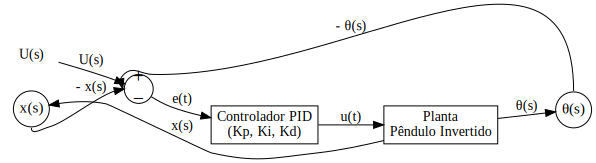

In [61]:
 #@title Diagrama de Blocos
from IPython.display import display
import graphviz

def mostrar_equacoes_simbolicas():
    texto_equacoes = """
=== MALHA FECHADA COM CONTROLADOR PID ===

→ Função de transferência da saída θ(s):

               U(s) * g * l * (M + m) * (Kd*s + Ki/s + Kp)
-----------------------------------------------------------------------
  [ g * l * (M + m) * (Kd*s + Ki/s + Kp) + (b*l*m*s - g*l*m*(M + m) +
    s² * ( I*(M + m) + M*l²*m ) ) ]

→ Função de transferência da saída x(s):

               U(s) * l * m * s * (Kd*s + Ki/s + Kp)
-----------------------------------------------------------------------
  [ l * m * s * (Kd*s + Ki/s + Kp) + (b*l*m*s - g*l*m*(M + m) +
    s² * ( I*(M + m) + M*l²*m ) ) ]

→ Função de transferência do controlador PID:

             Kd * s² + Kp * s + Ki
-----------------------------------------
                 s

→ Função de transferência da planta θ(s):

             g * l * (M + m)
-------------------------------------------
b*l*m*s - g*l*m*(M + m) + s² * ( I*(M + m) + M*l²*m )

→ Função de transferência da planta x(s):

             l * m * s
-------------------------------------------
b*l*m*s - g*l*m*(M + m) + s² * ( I*(M + m) + M*l²*m )

→ Função de transferência da malha fechada com realimentação unitária:

               G(s)*C(s)
----------------------------------
          1 + G(s)*C(s)

onde:

G(s) = função de transferência da planta
C(s) = função de transferência do PID
"""
    print(texto_equacoes)


def mostrar_equacoes_numericas(parametros):
    texto = f"""
=== MALHA FECHADA COM CONTROLADOR PID (Valores Numéricos) ===

Parâmetros usados:
M = {parametros['M']}, m = {parametros['m']}, l = {parametros['l']}, I = {parametros['I']}, b = {parametros['b']}
g = {parametros['g']}, Kp = {parametros['Kp']}, Ki = {parametros['Ki']}, Kd = {parametros['Kd']}

→ Função de transferência da saída θ(s):

               U(s) * {parametros['g']} * {parametros['l']} * ({parametros['M']} + {parametros['m']}) * ({parametros['Kd']}*s + {parametros['Ki']}/s + {parametros['Kp']})
----------------------------------------------------------------------------------------------------------
  [ {parametros['g']} * {parametros['l']} * ({parametros['M']} + {parametros['m']}) * ({parametros['Kd']}*s + {parametros['Ki']}/s + {parametros['Kp']}) + ( {parametros['b']}*{parametros['l']}*{parametros['m']}*s - {parametros['g']}*{parametros['l']}*{parametros['m']}*({parametros['M']} + {parametros['m']}) +
    s² * ( {parametros['I']}*({parametros['M']} + {parametros['m']}) + {parametros['M']}*{parametros['l']}²*{parametros['m']} ) ) ]

→ Função de transferência da saída x(s):

               U(s) * {parametros['l']} * {parametros['m']} * s * ({parametros['Kd']}*s + {parametros['Ki']}/s + {parametros['Kp']})
----------------------------------------------------------------------------------------------------------
  [ {parametros['l']} * {parametros['m']} * s * ({parametros['Kd']}*s + {parametros['Ki']}/s + {parametros['Kp']}) + ( {parametros['b']}*{parametros['l']}*{parametros['m']}*s - {parametros['g']}*{parametros['l']}*{parametros['m']}*({parametros['M']} + {parametros['m']}) +
    s² * ( {parametros['I']}*({parametros['M']} + {parametros['m']}) + {parametros['M']}*{parametros['l']}²*{parametros['m']} ) ) ]

→ Função de transferência do controlador PID:

             {parametros['Kd']} * s² + {parametros['Kp']} * s + {parametros['Ki']}
-----------------------------------------
                 s

→ Função de transferência da planta θ(s):

             {parametros['g']} * {parametros['l']} * ({parametros['M']} + {parametros['m']})
-----------------------------------------------------------
{parametros['b']}*{parametros['l']}*{parametros['m']}*s - {parametros['g']}*{parametros['l']}*{parametros['m']}*({parametros['M']} + {parametros['m']}) + s² * ( {parametros['I']}*({parametros['M']} + {parametros['m']}) + {parametros['M']}*{parametros['l']}²*{parametros['m']} )

→ Função de transferência da planta x(s):

             {parametros['l']} * {parametros['m']} * s
-----------------------------------------------------------
{parametros['b']}*{parametros['l']}*{parametros['m']}*s - {parametros['g']}*{parametros['l']}*{parametros['m']}*({parametros['M']} + {parametros['m']}) + s² * ( {parametros['I']}*({parametros['M']} + {parametros['m']}) + {parametros['M']}*{parametros['l']}²*{parametros['m']} )

→ Função de transferência da malha fechada com realimentação unitária:

               G(s)*C(s)
----------------------------------
          1 + G(s)*C(s)

onde:

G(s) = função de transferência da planta
C(s) = função de transferência do PID
"""
    print(texto)


def mostrar_diagrama_blocos_duas_realimentacoes():
    dot = graphviz.Digraph(format='svg')
    dot.attr(rankdir='LR', size='10')

    # Nós do sistema
    dot.node('U', 'U(s)', shape='plaintext')

    # Somador com sinais + e - explícitos
    dot.node('S', ' + \n−', shape='circle', width='0.4', height='0.4', fixedsize='true', fontsize='20')

    dot.node('PID', 'Controlador PID\n(Kp, Ki, Kd)', shape='box')
    dot.node('P', 'Planta\nPêndulo Invertido', shape='box')

    # Saídas com círculo
    dot.node('Theta', 'θ(s)', shape='circle', width='0.5', height='0.5', fixedsize='true', fontsize='15')
    dot.node('X', 'x(s)', shape='circle', width='0.5', height='0.5', fixedsize='true', fontsize='15')

    # Conexões principais
    dot.edge('U', 'S', label='U(s)')
    dot.edge('S', 'PID', label='e(t)')
    dot.edge('PID', 'P', label='u(t)')
    dot.edge('P', 'Theta', label='θ(s)')
    dot.edge('P', 'X', label='x(s)', constraint='false')

    # Realimentações negativas
    dot.edge('Theta', 'S', label='- θ(s)', tailport='n', headport='w', style='solid')
    dot.edge('X', 'S', label='- x(s)', tailport='s', headport='w', style='solid')

    display(dot)


def main():
    parametros_exemplo = {
        'M': 1.0,    # massa do carrinho
        'm': 0.1,    # massa do pêndulo
        'l': 0.5,    # comprimento do pêndulo
        'I': 0.006,  # momento de inércia do pêndulo
        'b': 0.1,    # coeficiente de atrito
        'g': 9.81,   # aceleração da gravidade
        'Kp': 10.0,  # ganho proporcional
        'Ki': 5.0,   # ganho integral
        'Kd': 1.0    # ganho derivativo
    }

    print("Escolha uma opção:")
    print("1 - Mostrar equações SIMBÓLICAS")
    print("2 - Mostrar equações NUMÉRICAS")
    opcao = input("Digite 1 ou 2: ")

    if opcao == '1':
        mostrar_equacoes_simbolicas()
        mostrar_diagrama_blocos_duas_realimentacoes()
    elif opcao == '2':
        mostrar_equacoes_numericas(parametros_exemplo)
        mostrar_diagrama_blocos_duas_realimentacoes()
    else:
        print("Opção inválida. Digite 1 ou 2.")


if __name__ == "__main__":
    main()

METODO DE SINTONIA DE CONTROLE DE ZIEGLER-NICHOLS - MALHA ABERTA

In [68]:
#@title Cálculo de L (Tempo Morto) e T ( Constante de Tempo)

M = float(input("Digite o valor de M (massa do carrinho): "))
m = float(input("Digite o valor de m (massa do pêndulo): "))
l = float(input("Digite o valor de l (comprimento do pêndulo): "))
b = float(input("Digite o valor de b (coeficiente de atrito viscoso): "))
I = float(input("Digite o valor de I (momento de inércia do pêndulo): "))
g = float(input("Digite o valor de g (aceleração da gravidade): "))





# Supondo que L é o tempo de atraso e T a constante de tempo do sistema


L = b / (M + m)        # Tempo de atraso morto
T = (I + m*l**2) / b   #  constante de tempo

print(f"\nParâmetros estimados da planta:")
print(f"L (atraso morto) = {L:.4f}")
print(f"T (constante de tempo) = {T:.4f}")


Digite o valor de M (massa do carrinho): 0.5
Digite o valor de m (massa do pêndulo): 0.3
Digite o valor de l (comprimento do pêndulo): 0.5
Digite o valor de b (coeficiente de atrito viscoso): 0.1
Digite o valor de I (momento de inércia do pêndulo): 0.006
Digite o valor de g (aceleração da gravidade): 9.81

Parâmetros estimados da planta:
L (atraso morto) = 0.1250
T (constante de tempo) = 0.8100


In [69]:
#@title Sintonia automática do PID (Ziegler-Nichols - Malha Aberta)

# Usar L e T calculados
print(f"Usando L = {L:.4f} e T = {T:.4f} para sintonia PID")

Kp = 1.2 * (T / L)
Ti = 2 * L
Td = 0.5 * L
Ki = Kp / Ti
Kd = Kp * Td

print("\n=== Parâmetros PID calculados por Ziegler-Nichols ===")
print(f"Kp = {Kp:.4f}")
print(f"Ki = {Ki:.4f}")
print(f"Kd = {Kd:.4f}")

# Escolha da perturbação
tipo_perturbacao = input("Escolha o tipo de perturbação (degrau, impulso, rampa): ").strip().lower()


Usando L = 0.1250 e T = 0.8100 para sintonia PID

=== Parâmetros PID calculados por Ziegler-Nichols ===
Kp = 7.7760
Ki = 31.1040
Kd = 0.4860
Escolha o tipo de perturbação (degrau, impulso, rampa): degrau


Digite os parâmetros do controlador PID (usando valores calculados na célula 2):
Kp = 6.0000, Ki = 2.4000, Kd = 3.7500


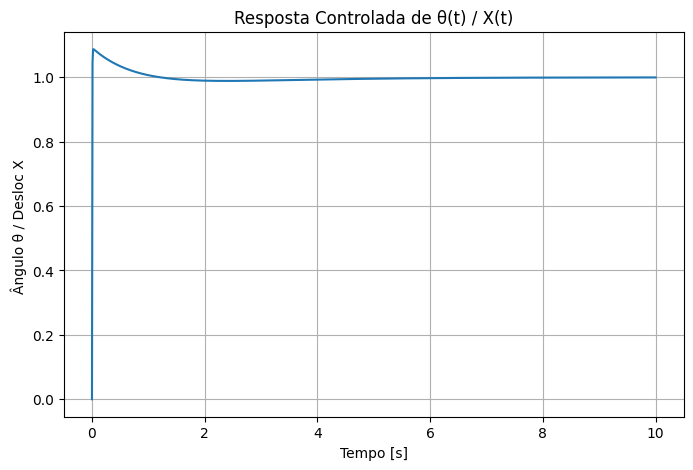

In [77]:
#@title Resposta em Malha Fechada PID
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

def simular_resposta(M, m, b, I, l, g, Kp, Ki, Kd, tipo_perturbacao):
    s = ctrl.tf('s')
    pid = Kd*s + Kp + Ki/s

    # Função de transferência da planta malha aberta para θ(s)
    num = [g*l*(M + m)]
    den = [I*(M + m) + M*l**2*m, b*l*m - g*l*m*(M + m), 0]

    planta_theta = ctrl.TransferFunction(num, den)

    # Função de transferência malha fechada com PID para θ(s)
    sistema_mf = ctrl.feedback(pid*planta_theta, 1)

    t = np.linspace(0, 10, 1000)
    if tipo_perturbacao == "degrau":
        u = np.ones_like(t)
    elif tipo_perturbacao == "impulso":
        u = np.zeros_like(t)
        u[0] = 1.0 / (t[1] - t[0])
    elif tipo_perturbacao == "rampa":
        u = t
    else:
        print("Tipo inválido. Usando degrau.")
        u = np.ones_like(t)

    t_out, y_out = ctrl.forced_response(sistema_mf, T=t, U=u)

    plt.figure(figsize=(8,5))
    plt.plot(t_out, y_out)
    plt.title("Resposta Controlada de θ(t) / X(t)")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Ângulo θ / Desloc X ")
    plt.grid(True)
    plt.show()

print("Digite os parâmetros do controlador PID (usando valores calculados na célula 2):")
print(f"Kp = {Kp:.4f}, Ki = {Ki:.4f}, Kd = {Kd:.4f}")

simular_resposta(M, m, b, I, l, g, Kp, Ki, Kd, tipo_perturbacao)


MÉTODO DE SINTONIA DE CONTROLE DE ZIEGLER-NICHOLS - MALHA FECHADA

In [72]:
#@title Pârametros da Planta (Pendulo Invertido)
M = 0.5    # massa do carrinho (kg)
m = 0.3   # massa do pêndulo (kg)
l = 0.5    # comprimento do pêndulo (m)
b = 0.1    # coeficiente de atrito viscoso
I = 0.006  # momento de inércia do pêndulo
g = 9.81   # gravidade (m/s²)


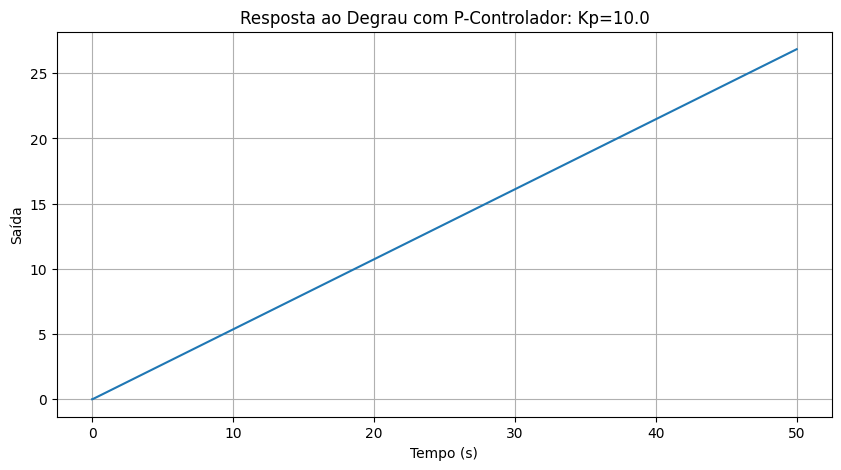

In [73]:
#@title Resposta ao Degrau com o Controlador Proporcional com Ki e Kd desativados para obter a oscilação do sistema

!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

def sistema_malha_fechada_p(M, m, b, I, l, g, Kp):
    # Matrizes do sistema linearizado
    denom = I*(M+m) + M*m*l**2
    A22 = -(I + m*l**2)*b / denom
    A23 = m**2 * g * l**2 / denom
    B2 = (I + m*l**2) / denom
    B3 = -m*l / denom

    # Modelo simplificado para demonstração
    num = [Kp*B2]
    den = [1, -A22 - Kp*B3, 0]

    sistema = ctrl.TransferFunction(num, den)
    return sistema

def simular_p(M, m, b, I, l, g, Kp):
    sistema = sistema_malha_fechada_p(M, m, b, I, l, g, Kp)
    t = np.linspace(0, 50, 1000)
    t_out, y_out = ctrl.step_response(sistema, T=t)

    plt.figure(figsize=(10,5))
    plt.plot(t_out, y_out)
    plt.title(f"Resposta ao Degrau com P-Controlador: Kp={Kp}")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Saída")
    plt.grid(True)
    plt.show()

# testar vários Kp para achar oscilação
Kp_test = 10.0  # ajuste aqui o ganho proporcional para testar
simular_p(M, m, b, I, l, g, Kp_test)

Kp calculado: 6.0000
Ki calculado: 2.4000
Kd calculado: 3.7500


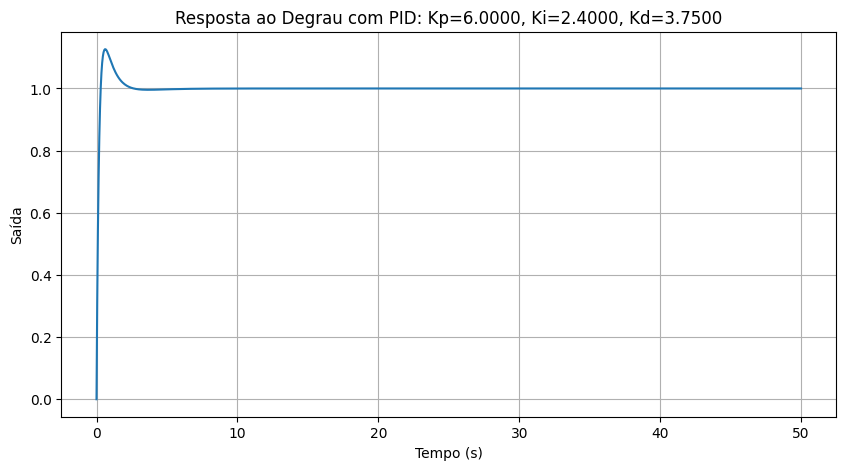

In [74]:
#@title Fórmulas Ziegler-Nichols para PID - Malha Fechada
# Depois de achar os valores críticos manualmente na célula 2:

Kcrit = 10.0  # ganho crítico (exemplo, coloque o que achar na célula 2)
Uc = 5.0      # período da oscilação (exemplo, medir no gráfico da célula 2)

# Fórmulas Ziegler-Nichols para PID
Kp = 0.6 * Kcrit
Ti = 0.5 * Uc
Td = 0.125 * Uc
Ki = Kp / Ti
Kd = Kp * Td

print(f"Kp calculado: {Kp:.4f}")
print(f"Ki calculado: {Ki:.4f}")
print(f"Kd calculado: {Kd:.4f}")

def sistema_malha_fechada_pid(M, m, b, I, l, g, Kp, Ki, Kd):
    # Mesma lógica para construir a planta e o controlador PID
    # Definindo a planta
    denom = I*(M+m) + M*m*l**2
    A22 = -(I + m*l**2)*b / denom
    A23 = m**2 * g * l**2 / denom
    B2 = (I + m*l**2) / denom
    B3 = -m*l / denom

    planta_num = [B2]
    planta_den = [1, -A22, 0]
    planta = ctrl.TransferFunction(planta_num, planta_den)

    # Controlador PID
    pid = ctrl.tf([Kd, Kp, Ki], [1, 0])  # Derivativo + Proporcional + Integral

    # Sistema em malha fechada
    sistema_mf = ctrl.feedback(pid*planta, 1)
    return sistema_mf

def simular_pid(M, m, b, I, l, g, Kp, Ki, Kd):
    sistema = sistema_malha_fechada_pid(M, m, b, I, l, g, Kp, Ki, Kd)
    t = np.linspace(0, 50, 1000)
    t_out, y_out = ctrl.step_response(sistema, T=t)

    plt.figure(figsize=(10,5))
    plt.plot(t_out, y_out)
    plt.title(f"Resposta ao Degrau com PID: Kp={Kp:.4f}, Ki={Ki:.4f}, Kd={Kd:.4f}")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Saída")
    plt.grid(True)
    plt.show()

# Simula com os valores PID calculados
simular_pid(M, m, b, I, l, g, Kp, Ki, Kd)


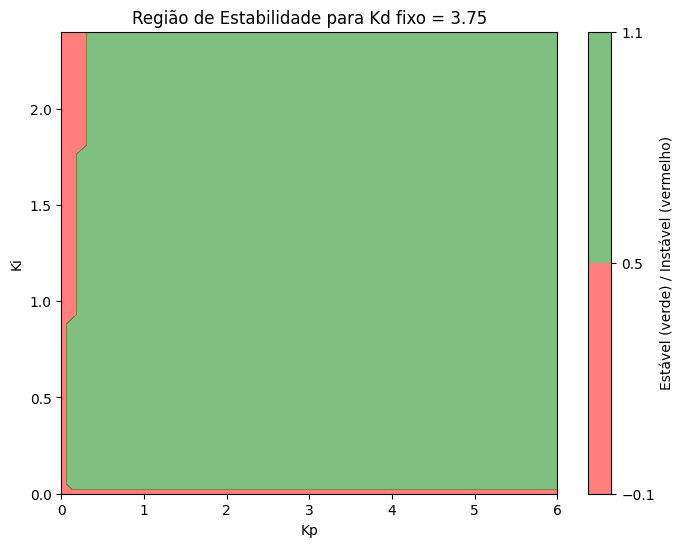

In [75]:
#@title Região de Estabilidade pelo Criterio de Routh
import numpy as np
import matplotlib.pyplot as plt

def analise_routh(coeffs):
    n = len(coeffs)
    m = (n + 1) // 2
    routh = np.zeros((n, m))

    routh[0, :len(coeffs[0::2])] = coeffs[0::2]
    if n > 1:
        routh[1, :len(coeffs[1::2])] = coeffs[1::2]

    for i in range(2, n):
        for j in range(m - 1):
            a = routh[i-2, 0]
            b = routh[i-2, j+1]
            c = routh[i-1, 0]
            d = routh[i-1, j+1]
            if c == 0:
                c = 1e-6
            routh[i, j] = ((c * b) - (a * d)) / c

    primeira_coluna = routh[:, 0]
    sinais = np.sign(primeira_coluna)
    n_mudancas = np.sum(sinais[:-1] != sinais[1:])
    estavel = (n_mudancas == 0) and np.all(primeira_coluna != 0)
    return estavel

def verificar_estabilidade_pid(M, m, b, I, l, g, Kp, Ki, Kd):
    denom = I*(M+m) + M*m*l**2
    A22 = -(I + m*l**2)*b / denom
    B2 = (I + m*l**2) / denom

    a3 = 1
    a2 = B2 * Kd - A22
    a1 = B2 * Kp
    a0 = B2 * Ki

    coeficientes = [a3, a2, a1, a0]
    return analise_routh(coeficientes)

def plot_regiao_estabilidade(M, m, b, I, l, g, Kd_fixo, Kp_range, Ki_range, passos=50):
    Kp_vals = np.linspace(*Kp_range, passos)
    Ki_vals = np.linspace(*Ki_range, passos)
    estabilidade = np.zeros((passos, passos), dtype=bool)

    for i, Kp in enumerate(Kp_vals):
        for j, Ki in enumerate(Ki_vals):
            estabilidade[j, i] = verificar_estabilidade_pid(M, m, b, I, l, g, Kp, Ki, Kd_fixo)

    plt.figure(figsize=(8,6))
    plt.contourf(Kp_vals, Ki_vals, estabilidade, levels=[-0.1, 0.5, 1.1], colors=['red','green'], alpha=0.5)
    plt.xlabel('Kp')
    plt.ylabel('Ki')
    plt.title(f'Região de Estabilidade para Kd fixo = {Kd_fixo}')
    plt.colorbar(label='Estável (verde) / Instável (vermelho)')
    plt.show()


# Parâmetros do sistema (seus valores)
M = 0.5
m = 0.3
b = 0.1
I = 0.006
l = 0.5
g = 9.81

# Valores fixos
Kd_fixo = 3.75

# Intervalo para Kp e Ki (você pode ajustar)
Kp_range = (0, 6)
Ki_range = (0, 2.4)

plot_regiao_estabilidade(M, m, b, I, l, g, Kd_fixo, Kp_range, Ki_range)


In [76]:
#@title Analise da Estabilidade pela Tabela de Routh
import numpy as np
import matplotlib.pyplot as plt

def gerar_tabela_routh(coef):
    n = len(coef)
    m = (n + 1) // 2
    routh = np.zeros((n, m))

    # Primeira linha (coeficientes de ordem par)
    routh[0, :len(coef[0::2])] = coef[0::2]
    # Segunda linha (coeficientes de ordem ímpar)
    if n > 1:
        routh[1, :len(coef[1::2])] = coef[1::2]

    for i in range(2, n):
        for j in range(m - 1):
            a = routh[i-2, 0]
            b = routh[i-2, j+1]
            c = routh[i-1, 0]
            d = routh[i-1, j+1]
            if c == 0:
                c = 1e-6  # Evitar divisão por zero
            routh[i, j] = ((c * b) - (a * d)) / c

    return routh

def imprimir_tabela_routh(routh):
    print("Tabela de Routh-Hurwitz:")
    for i, linha in enumerate(routh):
        print(f"linha {i}: ", end="")
        for val in linha:
            print(f"{val:10.4f}", end=" ")
        print()

def verificar_estabilidade_routh(coef):
    routh = gerar_tabela_routh(coef)
    imprimir_tabela_routh(routh)
    primeira_coluna = routh[:, 0]
    sinais = np.sign(primeira_coluna)
    n_mudancas = np.sum(sinais[:-1] != sinais[1:])
    estavel = (n_mudancas == 0) and np.all(primeira_coluna != 0)
    if estavel:
        print("Sistema estável (sem mudança de sinal na primeira coluna).")
    else:
        print(f"Sistema instável (mudanças de sinal na primeira coluna: {n_mudancas}).")
    return estavel

def verificar_estabilidade_pid(M, m, b, I, l, g, Kp, Ki, Kd):
    denom = I*(M+m) + M*m*l**2
    A22 = -(I + m*l**2)*b / denom
    B2 = (I + m*l**2) / denom

    # Coeficientes do polinômio característico: s³ + a2 s² + a1 s + a0 = 0
    a3 = 1
    a2 = B2 * Kd - A22
    a1 = B2 * Kp
    a0 = B2 * Ki

    coeficientes = [a3, a2, a1, a0]
    print(f"\nVerificando estabilidade para Kp={Kp}, Ki={Ki}, Kd={Kd}:")
    return verificar_estabilidade_routh(coeficientes)

# Exemplo: Parâmetros do sistema (coloque os seus valores)
M = 0.5
m = 0.3
b = 0.1
I = 0.006
l = 0.5
g = 9.81

# Parâmetros PID para testar
Kp = 6.0
Ki = 2.4
Kd = 3.75

# Testar e imprimir tabela
estavel = verificar_estabilidade_pid(M, m, b, I, l, g, Kp, Ki, Kd)



Verificando estabilidade para Kp=6.0, Ki=2.4, Kd=3.75:
Tabela de Routh-Hurwitz:
linha 0:     1.0000    11.4894 
linha 1:     7.3723     4.5957 
linha 2:    10.8660     0.0000 
linha 3:     4.5957     0.0000 
Sistema estável (sem mudança de sinal na primeira coluna).


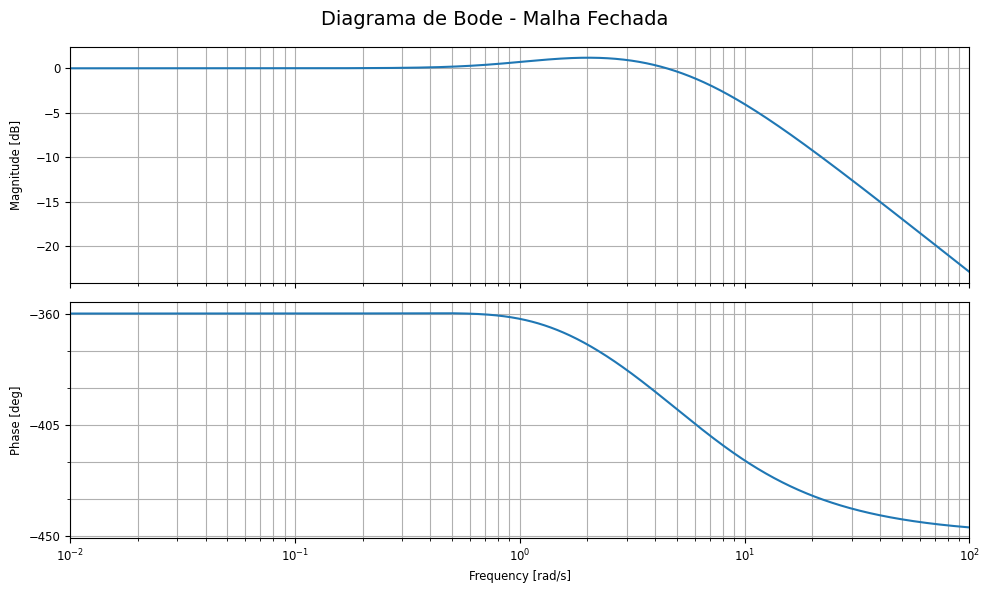

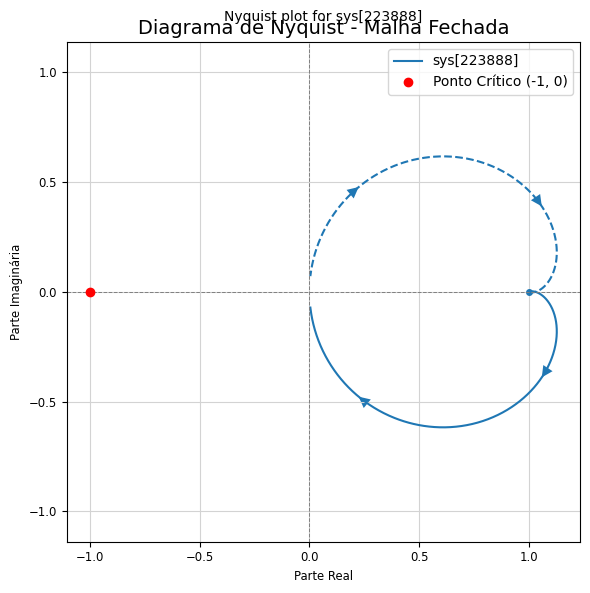

In [83]:
#@title Diagrama de Bode e Nyquist
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

def sistema_malha_fechada_pid(M, m, b, I, l, g, Kp, Ki, Kd):
    denom = I*(M+m) + M*m*l**2
    A22 = -(I + m*l**2)*b / denom
    B2 = (I + m*l**2) / denom
    planta = ctrl.TransferFunction([B2], [1, -A22, 0])

    pid = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
    sistema = ctrl.feedback(pid * planta, 1)
    return sistema

def plot_bode_niquist(M, m, b, I, l, g, Kp, Ki, Kd):
    sistema = sistema_malha_fechada_pid(M, m, b, I, l, g, Kp, Ki, Kd)

    # Bode
    plt.figure(figsize=(10, 6))
    ctrl.bode_plot(sistema, dB=True, omega_limits=(1e-2, 1e2), Hz=False)
    plt.suptitle("Diagrama de Bode - Malha Fechada", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Nyquist
    plt.figure(figsize=(6, 6))
    ctrl.nyquist_plot(sistema, omega=np.logspace(-2, 2, 1000))
    plt.title("Diagrama de Nyquist - Malha Fechada", fontsize=14)
    plt.xlabel("Parte Real")
    plt.ylabel("Parte Imaginária")
    plt.grid(True)
    plt.axis('equal')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.plot(-1, 0, 'ro', label='Ponto Crítico (-1, 0)')
    plt.legend()
    plt.show()

# Parâmetros do sistema
M = 0.5
m = 0.3
b = 0.1
I = 0.006
l = 0.5
g = 9.81

# Parâmetros PID
Kp = 6.0
Uc = 5.0
Ti = 0.5 * Uc
Td = 0.125 * Uc
Ki = Kp / Ti
Kd = Kp * Td

# Plotar
plot_bode_niquist(M, m, b, I, l, g, Kp, Ki, Kd)


##  Conclusão: Controle PID do Pêndulo Invertido

O controle PID aplicado ao pêndulo invertido se mostrou eficiente na estabilização de um sistema naturalmente instável, como é o caso do pêndulo em equilíbrio invertido. O ajuste adequado dos parâmetros $K_p$, $K_i$ e $K_d$. permite modificar a resposta do sistema de forma desejável, controlando o sobretempo, a oscilação e o regime permanente.

---

###  Região de Estabilidade

A **região de estabilidade** de um sistema contínuo no domínio de Laplace está relacionada à posição dos **polos**  do seu polinômio característico, que podem ser analisados através do **critério de Routh-Hurwitz**. esse critério permite determinar a estabilidade do sistema sem calcular explicitamente os polos, verificando apenas os coeficientes do polinômio característico.

Um sistema é estável **se todos os elementos da primeira coluna da tabela de Routh forem positivos**, indicando que todas as raízes têm parte real negativa e estão no semiplano esquerdo do plano complexo.

Para verificar isso, utilizamos:

A construção e análise da tabela de Routh-Hurwitz para determinar a estabilidade do sistema; **A plotagem do lugar das raízes, diagrama de Bode e diagrama de Nyquist**.

---

###  Critério de Routh-Hurwitz

O **Critério de Routh-Hurwitz** foi implementado para determinar a estabilidade sem a necessidade de calcular explicitamente os polos. A tabela de Routh permite verificar a quantidade de raízes com parte real positiva (instáveis) apenas a partir dos coeficientes do polinômio característico.

Um sistema é estável **se todos os elementos da primeira coluna da tabela de Routh forem positivos**.

---

###  Ajuste pelo Método de Ziegler–Nichols (Malha Fechada)

O método empírico de **Ziegler–Nichols** foi aplicado para estimar os parâmetros PID com base na resposta oscilatória do sistema com apenas controle proporcional.

Após encontrar o ganho crítico \( K_{crit} \) e o período de oscilação \( U_c \), os parâmetros foram definidos por:

$$
K_p = 0.6 \cdot K_{crit}, \quad
K_i = \frac{1.2 \cdot K_{crit}}{U_c}, \quad
K_d = 0.075 \cdot K_{crit} \cdot U_c
$$


Esses valores foram utilizados para simular a resposta ao degrau, resultando em menor tempo de estabilização e redução do erro de regime permanente.

---

###  Modelo do Sistema: Equações de Estado

O pêndulo invertido foi modelado como um sistema dinâmico linearizado com 3 estados: posição \( x \), velocidade \( \dot{x} \), e ângulo \( \theta \). A modelagem em espaço de estados foi expressa por:

$$
\dot{X}(t) = A X(t) + B U(t)
$$
$$
Y(t) = C X(t) + D U(t)
$$


Onde:

- \( X(t) = \begin{bmatrix} x \\ \dot{x} \\ \theta \end{bmatrix} \)
- \( A \), \( B \), \( C \), \( D \) são matrizes definidas a partir dos parâmetros físicos do sistema (massa, atrito, inércia, gravidade, comprimento do pêndulo)

---

###  Análise de Resposta e Frequência

Após projetar o controlador PID, diversas análises foram realizadas:

- **Resposta ao degrau**: para observar os efeitos do controlador sobre o tempo de subida, overshoot e estabilidade.
- **Diagrama de Bode**: para avaliar a margem de ganho e fase do sistema, bem como a resposta em frequência.
- **Diagrama de Nyquist**: para verificar a robustez e a estabilidade por realimentação.

---

###  Considerações finais

O projeto de controle PID para o pêndulo invertido mostra a importância de métodos combinados:

- Modelagem matemática (equações diferenciais e forma matricial);
- Ajuste experimental (Ziegler–Nichols);
- Análise analítica (Routh , Nyquist);
- Validação numérica (simulações no Python com `control`).

Esses elementos juntos garantem uma compreensão sólida e completa do sistema, permitindo controle preciso mesmo em sistemas instáveis por natureza.



## Dedicatória

<div style="text-align: justify;">
Dedico este trabalho ao Professor Vergillio, cuja orientação e dedicação foram essenciais para o desenvolvimento deste estudo. Agradeço pelo apoio constante, pelas valiosas ensinanças e pelo incentivo à busca pelo conhecimento. Sua inspiração motiva todos os alunos a superarem desafios e alcançarem a excelência acadêmica.
</div>
